In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('housepricesdata.csv')

Penjelasan:
1. Unit_Name: Nama Unit Apartmen
2. No_Rooms: Jumlah bedrooms
3. Bathroom: Jumlah kamar mandi
4. Locality: Daerah
5. Region: Kota/Kabupaten
6. Longitude dan Latitude: letak geografis
7. Furnished: 1 jika fully furnished, 0 jika non-furnished
8. Area: Luas
9. Tower: Lokasi Tower
10. Total_Facilities: Jumlah Total Fasilitas
11. Currency: Mata Uang (USD/IDR)
12. Annual_Price: Harga sewa tahunan (sesuai mata uang)

### Soal:

1. Perhatikan kolom 'Currency' dan 'Annual_Price'. Buatlah kolom baru bernama `CleanedPrice`. Kolom ini dibuat berdasarkan informasi dari 'Annual_Price' dan 'Currency', sehingga harga sewa tahunan di `CleanedPrice` memiliki mata uang yang sama, yaitu IDR (Rupiah). Gunakan Asumsi 1 USD = 15 000 IDR.

2. Analisalah kolom 'No_Rooms' dan 'CleanedPrice'. Buat visualisasi yang menurut Anda sesuai. Apakah ada kejanggalan? Jika ya, nyatakanlah apa yang membuat data-data tersebut janggal. Kemudian, perbaikilah (jika hal tersebut dapat dilakukan). Jika Anda tidak memilih untuk memperbaikinya, maka apa yang sebaiknya dilakukan pada baris-baris tersebut? 

3. Analisalah kolom 'Longitude' dan 'Latitude'. Apakah ada outlier? Jika ya, nyatakanlah apa yang membuat data-data tersebut outlier. Apakah outlier-outlier pada kolom `Longitude` merupakan sesuatu yang bisa dijelaskan (masuk akal), atau tidak? Jelaskan. 

4. Apakah outlier-outlier pada kolom `Latitude` merupakan sesuatu yang bisa dijelaskan (masuk akal)? Jelaskan.


### Nomor 1:

Perhatikan kolom 'Currency' dan 'Annual_Price'. Buatlah kolom baru bernama CleanedPrice. Kolom ini dibuat berdasarkan informasi dari 'Annual_Price' dan 'Currency', sehingga harga sewa tahunan di CleanedPrice memiliki mata uang yang sama, yaitu IDR (Rupiah). Gunakan Asumsi 1 USD = 15 000 IDR.

In [12]:
df.head()

,Unit_Name,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,Tower,Total_Facilities,Currency,Annual_Price
0,Taman Sari Semanggi Apartment 1BR Tower A,1,1,Semanggi,Jakarta Selatan,106.819159,-6.226598,1,43.0,Tower A,23,IDR,96000000
1,Puri Park View Apartment 2BR Semi Furnished,2,1,Kebon Jeruk,Jakarta Barat,106.756061,-6.192081,0,35.0,Tower CB,19,IDR,30000000
2,Metro Park Residence 2BR Fully Furnished,2,1,Kedoya,Jakarta Barat,106.757651,-6.186415,1,53.0,Tower Milan,22,IDR,70000000
3,Pondok Indah Golf Apartment 2BR View Golf Area,2,2,Pondok Indah,Jakarta Selatan,106.784600,-6.272637,1,85.0,Tower -,24,IDR,576000000
4,Season City Apartment 2BR Tower C,2,1,Grogol,Jakarta Barat,106.796056,-6.153652,0,48.0,Tower C,15,IDR,32000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5303 entries, 0 to 5302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unit_Name         5302 non-null   object 
 1   No_Rooms          5303 non-null   int64  
 2   Bathroom          5303 non-null   int64  
 3   Locality          5303 non-null   object 
 4   Region            5303 non-null   object 
 5   Longitude         5303 non-null   float64
 6   Latitude          5303 non-null   float64
 7   Furnished         5303 non-null   int64  
 8   Area              5303 non-null   float64
 9   Tower             5303 non-null   object 
 10  Total_Facilities  5303 non-null   int64  
 11  Currency          5303 non-null   object 
 12  Annual_Price      5303 non-null   int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 538.7+ KB


In [6]:
#checking missing value
df.isnull().sum()

Unit_Name           1
No_Rooms            0
Bathroom            0
Locality            0
Region              0
Longitude           0
Latitude            0
Furnished           0
Area                0
Tower               0
Total_Facilities    0
Currency            0
Annual_Price        0
dtype: int64

In [3]:
df[df['Unit_Name'].isnull()]

,Unit_Name,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,Tower,Total_Facilities,Currency,Annual_Price
1491,NaN,2,2,Thamrin,Jakarta Pusat,106.818654,-6.194443,1,74.0,Tower Cosmo Mansion,21,IDR,120000000


pada baris 1491 ini terdapat nilai yang tidak tercatat yakni pada kolom 'Unit_Name'. Berhubung kolom ini hanya merupakan nama unit jadi saya mengisi missing value ini dengan nilai 'UNKNOWN'

In [4]:
df['Unit_Name'] = df['Unit_Name'].fillna('UNKNOWN')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5303 entries, 0 to 5302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unit_Name         5303 non-null   object 
 1   No_Rooms          5303 non-null   int64  
 2   Bathroom          5303 non-null   int64  
 3   Locality          5303 non-null   object 
 4   Region            5303 non-null   object 
 5   Longitude         5303 non-null   float64
 6   Latitude          5303 non-null   float64
 7   Furnished         5303 non-null   int64  
 8   Area              5303 non-null   float64
 9   Tower             5303 non-null   object 
 10  Total_Facilities  5303 non-null   int64  
 11  Currency          5303 non-null   object 
 12  Annual_Price      5303 non-null   int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 538.7+ KB


setelah semua kolom sudah memiliki jumlah rows yang sama dan data type pada tiap kolomnya juga sudah cocok, maka sudah bisa dilanjutkan untuk menghitung clean price

In [16]:
df['Currency'].unique()

array(['IDR', 'USD'], dtype=object)

In [5]:
df['Cleaned_Price'] = df['Annual_Price']
df.loc[df['Currency'] == 'USD', 'Cleaned_Price'] = df['Cleaned_Price'] * 15000
df[df['Currency'] == 'USD']

,Unit_Name,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,Tower,Total_Facilities,Currency,Annual_Price,Cleaned_Price
76,1 Park Residences 2BR Fully Furnished,2,2,Gandaria,Jakarta Selatan,106.788904,-6.245680,1,91.0,Tower A,24,USD,19800,297000000
358,Kemang Village Apartment 3BR View City,3,2,Kemang,Jakarta Selatan,106.811453,-6.259374,1,168.0,Tower Ritz,22,USD,28800,432000000
443,Kemang Village Apartment 2BR Fully Furnished,2,2,Kemang,Jakarta Selatan,106.811453,-6.259374,1,130.0,Tower Intercone,21,USD,20400,306000000
453,1 Park Residences 2BR View City,2,2,Gandaria,Jakarta Selatan,106.788904,-6.245680,1,94.0,Tower B,24,USD,21600,324000000
462,BEST DEAL & still negotiable !!! SETIABUDI SKY...,3,2,Setiabudi,Jakarta Selatan,106.828806,-6.215463,1,135.0,Tower 1,18,USD,27600,414000000
770,Residences 8 Senopati 1BR,1,1,Senopati,Jakarta Selatan,106.806005,-6.228974,1,94.0,Tower 3,14,USD,19200,288000000
781,District 8 Senopati 2BR FULLY FURNISHED,2,2,Senopati,Jakarta Selatan,106.806680,-6.228444,1,105.0,Tower Infinity,18,USD,28800,432000000
1033,District 8 Senopati 3BR,3,3,Senopati,Jakarta Selatan,106.806680,-6.228444,1,179.0,Tower Infinity,18,USD,42000,630000000
1055,Kemang Village Apartment 4BR View City (Selatan),4,3,Kemang,Jakarta Selatan,106.811453,-6.259374,0,249.0,Tower Bloomington,19,USD,44400,666000000
1149,Pakubuwono Residence 3BR Tower Sandalwood,3,3,Pakubuwono,Jakarta Selatan,106.786080,-6.236956,0,303.0,Tower Sandalwood,22,USD,54000,810000000


### Nomor 2:

Analisalah kolom 'No_Rooms' dan 'CleanedPrice'. Buat visualisasi yang menurut Anda sesuai. Apakah ada kejanggalan? Jika ya, nyatakanlah apa yang membuat data-data tersebut janggal. Kemudian, perbaikilah (jika hal tersebut dapat dilakukan). Jika Anda tidak memilih untuk memperbaikinya, maka apa yang sebaiknya dilakukan pada baris-baris tersebut?

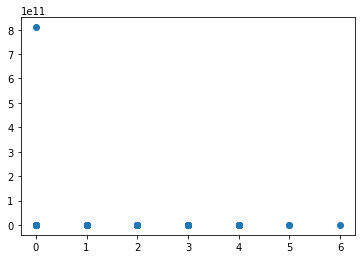

In [6]:
# Cek korelasi
plt.scatter(x=df['No_Rooms'], y=df['Cleaned_Price'])
plt.show()

Berdasarkan plot diatas terlihat bahwasannya terdapat harga yang terlalu tinggi, hal ini tidak normal. Dengan itu maka kita perlu memeriksa terlebih dahulu value tersebut.

In [7]:
# karena titik tersebut berada di angka 8M maka kita perlu mengecek pada nilai tersebut
df[df['Cleaned_Price'] >= 8000000000]

,Unit_Name,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,Tower,Total_Facilities,Currency,Annual_Price,Cleaned_Price
1163,Signature Park Grande Studio Fully Furnished,0,1,MT Haryono,Jakarta Timur,106.866201,-6.245201,1,25.0,Tower Green Signature,20,USD,54000000,810000000000


Berdasarkan data di atas ini, terdapat beberapa kemungkinan yang dapat terjadi, ada kemungkinan outlier ini di dapat karena kesalah input. Terdapat beberapa opsi yang dapat dilakukan terhadap data outlier ini, seperti dibuang atau dimodified. 

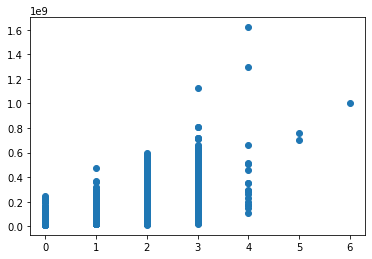

In [8]:
# Opsi pertama (Dibuang)
# Kita dapat membuang data outlier ini karena hanya terdapat satu row saja pada datanya
df_exclude = df[df['Unit_Name'] != 'Signature Park Grande Studio Fully Furnished']

# Cek korelasi terhadap data yang sudah di exclude outliernya
plt.scatter(x=df_exclude['No_Rooms'], y=df_exclude['Cleaned_Price'])
plt.show()

Jika dari sisi bisnis tidak boleh untuk membuang data outlier ini, maka kita dapat mengganti value tersebut. Terdapat beberapa opsi dalam mengganti value, kita asumsikan bahwa terjadinya kesalahan input pada currency, maka value tersebut jatuh ke angka IDR 54 Juta (normal). Namun hal ini dapat beresiko jika asumsi kita salah, jadi agar lebih aman kita dapat merubah value tersebut menggunakan rataan apartemen lain dengan jumlah room yang sama.

In [9]:
# Mengganti dengan rataan
rataan_0rooms = df[df['No_Rooms'] == 0]['Cleaned_Price'].mean()
df.loc[df['Unit_Name'] == 'Signature Park Grande Studio Fully Furnished', 'Cleaned_Price'] = rataan_0rooms

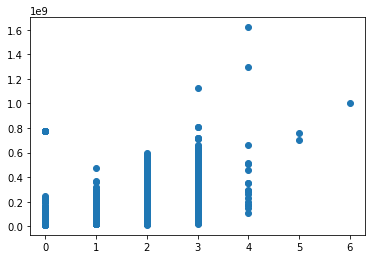

In [10]:
# Cek hasil setelah diterapkan rataan pada data
plt.scatter(x=df['No_Rooms'], y=df['Cleaned_Price'])
plt.show()

Berdasarkan visualisasi data di atas ini ternyata masih terdapat beberapa data yang berpotensi untuk menjadi outlier pada cleaned price. Saya memiliki inisiasi untuk mencoba melakukan treatment dengan mengganti nilai dari cleaned price dengan rataan by locality. Karena saya merasa untuk apartement di tiap daerahnya memiliki harga yang berbeda-beda. 

In [11]:
df[df['Cleaned_Price'] > 900000000]

,Unit_Name,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,Tower,Total_Facilities,Currency,Annual_Price,Cleaned_Price
3611,ST Moritz Apartment 6BR Fully Furnished,6,4,Puri Indah,Jakarta Barat,106.738730,-6.190723,1,576.0,Tower Ambassador,24,IDR,1000000000,1.000000e+09
3622,Pacific Place Residence 4BR Semi Furnished,4,5,SCBD,Jakarta Selatan,106.810134,-6.225613,0,500.0,Tower 2,21,IDR,1296000000,1.296000e+09
3923,Pakubuwono Residence 4BR Tower CottonWood,4,4,Pakubuwono,Jakarta Selatan,106.786080,-6.236956,1,548.0,Tower CottonWood,24,USD,108000,1.620000e+09
4395,Essence Darmawangsa Apartment 3BR Tower East,3,3,Dharmawangsa,Jakarta Selatan,106.804426,-6.258746,1,322.0,Tower East,22,IDR,1128000000,1.128000e+09



Dan ternyata terdapat 4 data yang memiliki harga di atas IDR 900 Juta. Dengan ini saya ingin melakukan treatment pada beberapa di atas dengan menggunakan harga rataan berdasarkan locality.

In [12]:
# Mengganti beberapa data yang berpotensi outlier dengan AVG by locality

# Puri Indah
pi_avg = df[df['Locality'] == 'Puri Indah']['Cleaned_Price'].mean()
df.loc[df['Unit_Name'] == 'ST Moritz Apartment 6BR Fully Furnished', 'Cleaned_Price'] = pi_avg

# SCBD
scbd_avg = df[df['Locality'] == 'SCBD']['Cleaned_Price'].mean()
df.loc[df['Unit_Name'] == 'Pacific Place Residence 4BR Semi Furnished', 'Cleaned_Price'] = scbd_avg

# Pakubuwono
p_avg = df[df['Locality'] == 'Pakubuwono']['Cleaned_Price'].mean()
df.loc[df['Unit_Name'] == 'Pakubuwono Residence 4BR Tower CottonWood', 'Cleaned_Price'] = p_avg

# Dharmawangsa
d_avg = df[df['Locality'] == 'Dharmawangsa']['Cleaned_Price'].mean()
df.loc[df['Unit_Name'] == 'Essence Darmawangsa Apartment 3BR Tower East', 'Cleaned_Price'] = d_avg

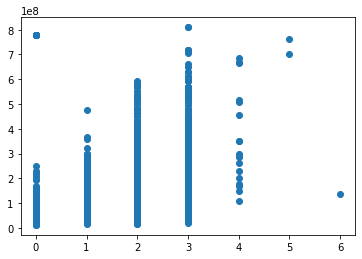

In [13]:
plt.scatter(x=df['No_Rooms'], y=df['Cleaned_Price'])
plt.show()

Berdasarkan visualisasi data di atas ini kita dapat melihat korelasi antara jumlah ruangan dengan harga sewa tahunan apartemen, yang mana seiring bertambahnya jumlah kamar pada apartemen maka biaya sewa tahunannya cenderung naik.

### Nomor 3:

Analisalah kolom 'Longitude' dan 'Latitude'. Apakah ada outlier? Jika ya, nyatakanlah apa yang membuat data-data tersebut outlier. Apakah outlier-outlier pada kolom Longitude merupakan sesuatu yang bisa dijelaskan (masuk akal), atau tidak? Jelaskan.

<AxesSubplot:xlabel='Longitude'>

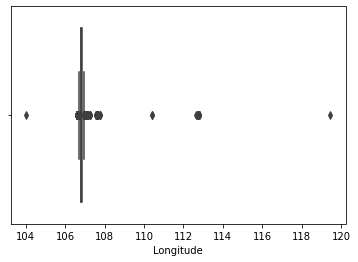

In [15]:
#Cek outlier pada data
sns.boxplot(x=df['Longitude'])

Berdasarkan visualisasi data di atas terdapat outlier, yang mana ditemukan satu titik yang berbeda sangat jauh yakni > 118 

In [16]:
df[df['Longitude'] > 118]

,Unit_Name,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,Tower,Total_Facilities,Currency,Annual_Price,Cleaned_Price
1500,Vida View Makassar 2BR View Kolam renang garde...,2,1,Panakkukang,Makassar,119.441818,-5.15505,1,42.0,Tower Ashton,17,IDR,60000000,60000000.0


Untuk mengetahui titik data tersebut merupakan outlier atau bukan maka diperlukan beberapa cara. Salah satu yang paling sederhana yakni dapat mengeceknya melalui internet terkait Longitude dan Latitude pada locality tersebut. Dan setelah saya cek ternyata untuk data tersebut merupakan data yang memang terdapat di Indonesia, dengan ini maka dapat dinyatakan data tersebut bukanlah outlier. 

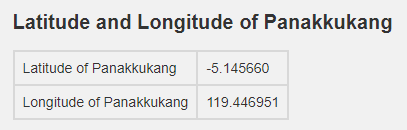

### Nomor 4:

Apakah outlier-outlier pada kolom Latitude merupakan sesuatu yang bisa dijelaskan (masuk akal)? Jelaskan.

<AxesSubplot:xlabel='Latitude'>

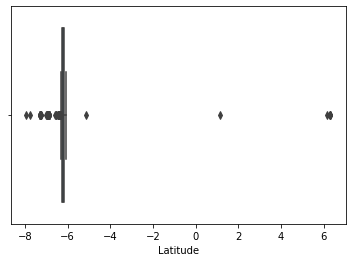

In [18]:
# Cek data pada Latitude
sns.boxplot(x=df['Latitude'])

In [19]:
# Mencari value > 0 pada kolom Latitude
df[df['Latitude'] > 0]

,Unit_Name,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,Tower,Total_Facilities,Currency,Annual_Price,Cleaned_Price
826,Best Western Mangga Dua Studio View City,0,1,Mangga Dua,Jakarta Pusat,106.827261,6.139958,1,33.0,Tower 1,18,IDR,48000000,48000000.0
951,B Residence BSD 1BR Tower lotus,0,1,BSD City,Tangerang,106.638100,6.304300,1,26.0,Tower lotus,20,IDR,40000000,40000000.0
1140,B Residence BSD Studio Non Furnished,0,1,BSD City,Tangerang,106.638100,6.304300,0,20.0,Tower Rose,17,IDR,40000000,40000000.0
1667,Nagoya Mansion Apartment Studio Tower B,0,1,Lubuk Baja,Batam,104.014900,1.143400,1,28.0,Tower B,12,IDR,72000000,72000000.0
2344,B Residence BSD Studio Fully Furnished,0,1,BSD City,Tangerang,106.638100,6.304300,1,25.0,Tower Tulip,20,IDR,55000000,55000000.0
3143,B Residence BSD Studio Furnished,0,1,BSD City,Tangerang,106.638100,6.304300,1,25.0,Tower Tulip,18,IDR,55000000,55000000.0
3175,B Residence BSD Studio View AEON Mall,0,1,BSD City,Tangerang,106.638100,6.304300,1,22.0,Tower Tulip,18,IDR,45000000,45000000.0
4469,B Residence BSD Studio Furnished,0,1,BSD City,Tangerang,106.638100,6.304300,1,26.0,Tower Tulip,19,IDR,60000000,60000000.0


Berdasarkan data di atas terdapat 8 baris data yang berpotensi menjadi outlier saat saya set batas > 0. Dari 8 baris data tersebut terbagi menjadi 3 locality, yakni BSD City, Lubuk Baja, dan Mangga Dua. Dengan ini saya ingin melakukan hal yang sama untuk memastikan data ini outlier atau bukan dengan memeriksanya melalui internet.

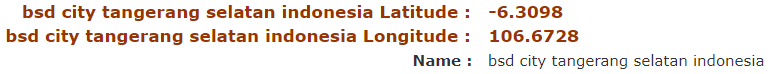

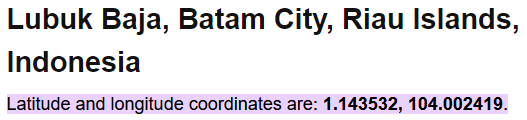

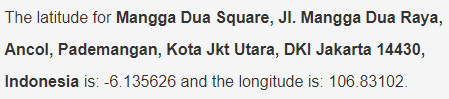

Dari informasi yang saya dapat dari internet terkait Longitude dan Latitude pada beberapa daerah di atas ternyata untuk daerah Lubuk Baja, Batam memiliki Longitude dan Latitude yang sesuai. Sementara untuk BSD City dan Mangga Dua tidak sesuai dengan informasi Longitude dan Latitude yang diperoleh dari internet, karena seharusnya untuk BSD City dan Mangga Dua memiliki Latitude minus.

<AxesSubplot:xlabel='Latitude'>

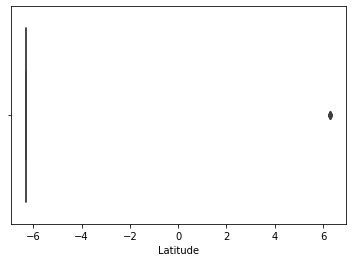

In [22]:
# Cek data untuk locality BSD City

bsd_city = df[df['Locality'] == 'BSD City']
sns.boxplot(x=bsd_city.Latitude)

Berdasarkan visualisasi data di atas terlihat bahwasannya untuk locality BSD City rata-rata memiliki latitude -6.xx. Maka dapat dinyatakan bahwasannya baris data yang memiliki latitude 6.xx merupakan outlier. Dengan ini maka saya akan mengganti value tersebut dengan rataan latitude BSD City lainnya.

In [23]:
# Cari rataan tanpa outlier
bsdcity_avg = bsd_city[bsd_city['Latitude'] < 0]['Latitude'].mean()

# Outlier BSD City
bsdcity_out = bsd_city[bsd_city['Latitude'] > 0]

# Mengganti value dengan rataan
df.loc[df['Unit_Name'].isin(bsdcity_out['Unit_Name']), 'Latitude'] = bsdcity_avg

<AxesSubplot:xlabel='Latitude'>

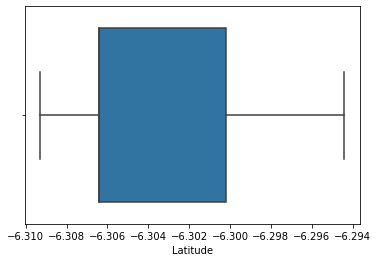

In [24]:
# Cek data yang baru setelah di replace
bsdcity_new = df[df['Locality'] == 'BSD City']
sns.boxplot(x=bsdcity_new.Latitude)

Berdasarkan visualisasi data di atas sudah terlihat bahwasannya untuk locality BSD City sudah rapih dan tidak terdapat outlier di dalamnya. Selanjutnya perlu dilakukan treatment terhadap outlier yang terdapat pada baris data locality Mangga Dua.

In [25]:
# Cek data untuk locality Mangga Dua
df[df['Locality'] == 'Mangga Dua'].head()

,Unit_Name,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,Tower,Total_Facilities,Currency,Annual_Price,Cleaned_Price
826,Best Western Mangga Dua Studio View City,0,1,Mangga Dua,Jakarta Pusat,106.827261,6.139958,1,33.0,Tower 1,18,IDR,48000000,48000000.0


Untuk kasus locality di Mangga Dua ternyata hanya terdapat satu baris data. Maka dapat langsung diubah saja terkait value Latitude pada baris data tersebut dengan value yang sesuai dengan informasi yang diperoleh dari internet yakni Latitude dengan -6.xx.

In [26]:
# Ganti value menjadi minus
df.loc[df['Locality'] == 'Mangga Dua', 'Latitude'] = -df['Latitude']

<AxesSubplot:xlabel='Latitude'>

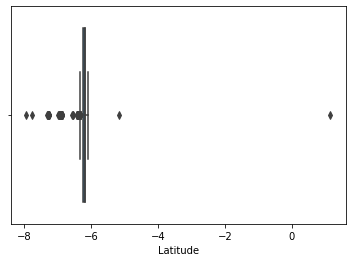

In [27]:
# Cek Latitude secara menyeluruh
sns.boxplot(x=df['Latitude'])

Berdasarkan visualisasi data di atas sudah dapat dilihat bahwasannya outlier pada Latitude sudah teratasi dan hanya menyisakan satu data Latitude dengan nilai di atas 0, yaitu Lubuk Baja(Valid).

### Nomor 5: